# Concrete Strength Analysis

In the following notebook we will be analysing the dataset from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [46]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'

columns = ['Cement', 'BFS', 'FLA', 'Water', 'SP', 'CA', 'FA', 'Age', 'CCS']

data = pd.read_excel(url, names = columns)

In [47]:
print(data.head(20))

    Cement    BFS  FLA  Water   SP      CA     FA  Age        CCS
0    540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  79.986111
1    540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  61.887366
2    332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  40.269535
3    332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  41.052780
4    198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  44.296075
5    266.0  114.0  0.0  228.0  0.0   932.0  670.0   90  47.029847
6    380.0   95.0  0.0  228.0  0.0   932.0  594.0  365  43.698299
7    380.0   95.0  0.0  228.0  0.0   932.0  594.0   28  36.447770
8    266.0  114.0  0.0  228.0  0.0   932.0  670.0   28  45.854291
9    475.0    0.0  0.0  228.0  0.0   932.0  594.0   28  39.289790
10   198.6  132.4  0.0  192.0  0.0   978.4  825.5   90  38.074244
11   198.6  132.4  0.0  192.0  0.0   978.4  825.5   28  28.021684
12   427.5   47.5  0.0  228.0  0.0   932.0  594.0  270  43.012960
13   190.0  190.0  0.0  228.0  0.0   932.0  670.0   90  42.326932
14   304.0

In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement    1030 non-null float64
BFS       1030 non-null float64
FLA       1030 non-null float64
Water     1030 non-null float64
SP        1030 non-null float64
CA        1030 non-null float64
FA        1030 non-null float64
Age       1030 non-null int64
CCS       1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [49]:
print(data.describe())

            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485    54.187136   181.566359     6.203112   
std     104.507142    86.279104    63.996469    21.355567     5.973492   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   142.950000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918592   773.578883    45.662136    35.817836  
std      77.753818    80.175427    63.169912    16.705679  
min     801.000000   594.000000     1.000000     2.331808  
25%     932.000000   730.950000  

In [50]:
print(data.isnull().sum())

Cement    0
BFS       0
FLA       0
Water     0
SP        0
CA        0
FA        0
Age       0
CCS       0
dtype: int64


## Data Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [52]:
data = pd.DataFrame(scaler.fit_transform(data), columns = columns)

In [53]:
print(data.describe())

            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean      0.409054     0.205608     0.270800     0.477576     0.192643   
std       0.238601     0.240064     0.319822     0.170504     0.185512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.206336     0.000000     0.000000     0.344511     0.000000   
50%       0.390183     0.061213     0.000000     0.504990     0.197205   
75%       0.566210     0.397746     0.591054     0.560878     0.315528   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean      0.499763     0.450524     0.122698     0.417181  
std       0.226029     0.201143     0.173544     0.208125  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.380814     0.343578  

## Visualization

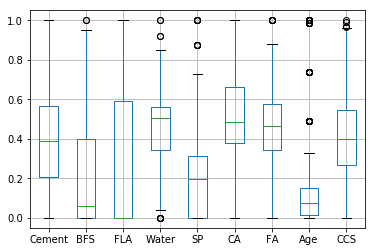

In [54]:
import matplotlib.pyplot as plt

data.boxplot(column = columns)

plt.show()

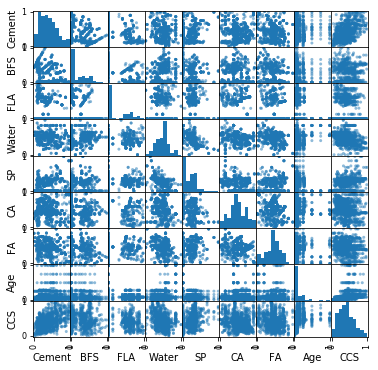

In [55]:
pd.plotting.scatter_matrix(data, figsize=(6, 6))
plt.show()

In [56]:
print(data.corr())

          Cement       BFS       FLA     Water        SP        CA        FA  \
Cement  1.000000 -0.275193 -0.397475 -0.081544  0.092771 -0.109356 -0.222720   
BFS    -0.275193  1.000000 -0.323569  0.107286  0.043376 -0.283998 -0.281593   
FLA    -0.397475 -0.323569  1.000000 -0.257044  0.377340 -0.009977  0.079076   
Water  -0.081544  0.107286 -0.257044  1.000000 -0.657464 -0.182312 -0.450635   
SP      0.092771  0.043376  0.377340 -0.657464  1.000000 -0.266303  0.222501   
CA     -0.109356 -0.283998 -0.009977 -0.182312 -0.266303  1.000000 -0.178506   
FA     -0.222720 -0.281593  0.079076 -0.450635  0.222501 -0.178506  1.000000   
Age     0.081947 -0.044246 -0.154370  0.277604 -0.192717 -0.003016 -0.156094   
CCS     0.497833  0.134824 -0.105753 -0.289613  0.366102 -0.164928 -0.167249   

             Age       CCS  
Cement  0.081947  0.497833  
BFS    -0.044246  0.134824  
FLA    -0.154370 -0.105753  
Water   0.277604 -0.289613  
SP     -0.192717  0.366102  
CA     -0.003016 -0.16492

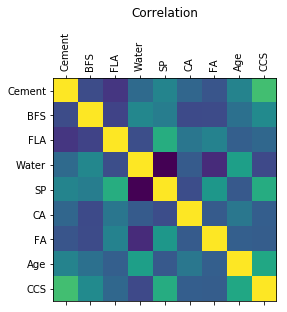

In [57]:
plt.matshow(data.corr())
plt.xticks(range(len(columns)), columns, rotation = 90)
plt.yticks(range(len(columns)), columns)
plt.title("Correlation", pad = 50)
plt.show()

## Model Training

In [59]:
from sklearn.model_selection import train_test_split

X = data.drop('CCS', axis=1)
Y = data['CCS']

print(X.head(5))
print(Y.head(5))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

     Cement       BFS  FLA     Water       SP        CA        FA       Age
0  1.000000  0.000000  0.0  0.321357  0.07764  0.694767  0.205720  0.074176
1  1.000000  0.000000  0.0  0.321357  0.07764  0.738372  0.205720  0.074176
2  0.526256  0.396494  0.0  0.848303  0.00000  0.380814  0.000000  0.739011
3  0.526256  0.396494  0.0  0.848303  0.00000  0.380814  0.000000  1.000000
4  0.220548  0.368392  0.0  0.560878  0.00000  0.515698  0.580783  0.986264
0    0.967445
1    0.741964
2    0.472642
3    0.482400
4    0.522806
Name: CCS, dtype: float64


In [72]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(50, input_dim = 8, activation = 'tanh'))
model.add(Dense(50, activation = 'tanh'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [74]:
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.1, nesterov=True)

model.compile( loss = "mean_squared_error", 
               optimizer = sgd, 
               metrics=['accuracy']
             )

model.fit(X_train, Y_train, epochs = 200, verbose = 1)

Epoch 1/200
927/927 [==============================] - 0s 443us/step - loss: 0.0101 - acc: 0.0022
Epoch 2/200
927/927 [==============================] - 0s 28us/step - loss: 0.0100 - acc: 0.0022
Epoch 3/200
927/927 [==============================] - 0s 29us/step - loss: 0.0100 - acc: 0.0022
Epoch 4/200
927/927 [==============================] - 0s 28us/step - loss: 0.0100 - acc: 0.0022
Epoch 5/200
927/927 [==============================] - 0s 29us/step - loss: 0.0100 - acc: 0.0022
Epoch 6/200
927/927 [==============================] - 0s 29us/step - loss: 0.0100 - acc: 0.0022
Epoch 7/200
927/927 [==============================] - 0s 30us/step - loss: 0.0100 - acc: 0.0022
Epoch 8/200
927/927 [==============================] - 0s 29us/step - loss: 0.0100 - acc: 0.0022
Epoch 9/200
927/927 [==============================] - 0s 29us/step - loss: 0.0100 - acc: 0.0022
Epoch 10/200
927/927 [==============================] - 0s 30us/step - loss: 0.0100 - acc: 0.0022
Epoch 11/200
927/927 [======

927/927 [==============================] - 0s 32us/step - loss: 0.0098 - acc: 0.0022
Epoch 85/200
927/927 [==============================] - 0s 31us/step - loss: 0.0098 - acc: 0.0022
Epoch 86/200
927/927 [==============================] - 0s 30us/step - loss: 0.0098 - acc: 0.0022
Epoch 87/200
927/927 [==============================] - 0s 30us/step - loss: 0.0098 - acc: 0.0022
Epoch 88/200
927/927 [==============================] - 0s 30us/step - loss: 0.0098 - acc: 0.0022
Epoch 89/200
927/927 [==============================] - 0s 29us/step - loss: 0.0098 - acc: 0.0022
Epoch 90/200
927/927 [==============================] - 0s 32us/step - loss: 0.0098 - acc: 0.0022
Epoch 91/200
927/927 [==============================] - 0s 28us/step - loss: 0.0098 - acc: 0.0022
Epoch 92/200
927/927 [==============================] - 0s 28us/step - loss: 0.0098 - acc: 0.0022
Epoch 93/200
927/927 [==============================] - 0s 29us/step - loss: 0.0098 - acc: 0.0022
Epoch 94/200
927/927 [===========

927/927 [==============================] - 0s 31us/step - loss: 0.0096 - acc: 0.0022
Epoch 168/200
927/927 [==============================] - 0s 28us/step - loss: 0.0096 - acc: 0.0022
Epoch 169/200
927/927 [==============================] - 0s 29us/step - loss: 0.0096 - acc: 0.0022
Epoch 170/200
927/927 [==============================] - 0s 28us/step - loss: 0.0096 - acc: 0.0022
Epoch 171/200
927/927 [==============================] - 0s 28us/step - loss: 0.0096 - acc: 0.0022
Epoch 172/200
927/927 [==============================] - 0s 32us/step - loss: 0.0096 - acc: 0.0022
Epoch 173/200
927/927 [==============================] - 0s 30us/step - loss: 0.0096 - acc: 0.0022
Epoch 174/200
927/927 [==============================] - ETA: 0s - loss: 0.0090 - acc: 0.0000e+0 - 0s 31us/step - loss: 0.0096 - acc: 0.0022
Epoch 175/200
927/927 [==============================] - 0s 32us/step - loss: 0.0096 - acc: 0.0022
Epoch 176/200
927/927 [==============================] - 0s 32us/step - loss: 0.0

In [75]:
model.evaluate(X_test, Y_test, verbose = 0)

[0.010557934716434299, 0.0]

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [83]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

Cement    0.350000
BFS       0.403450
FLA       0.607796
Water     0.216367
SP        0.322981
CA        0.293605
FA        0.189413
Age       0.057692
CCS       0.263739
dtype: float64
(748, 9)


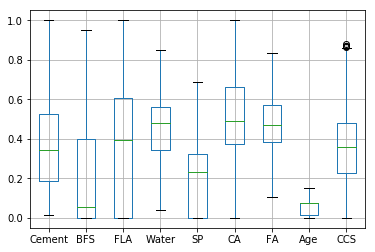

      Cement       BFS  FLA     Water       SP        CA        FA       Age
1   1.000000  0.000000  0.0  0.321357  0.07764  0.738372  0.205720  0.074176
8   0.374429  0.317195  0.0  0.848303  0.00000  0.380814  0.190667  0.074176
11  0.220548  0.368392  0.0  0.560878  0.00000  0.515698  0.580783  0.074176
14  0.461187  0.211464  0.0  0.848303  0.00000  0.380814  0.190667  0.074176
21  0.085845  0.582638  0.0  0.560878  0.00000  0.715116  0.534119  0.074176
1     0.741964
8     0.542219
11    0.320054
14    0.566631
21    0.322742
Name: CCS, dtype: float64
Epoch 1/200
673/673 [==============================] - 0s 36us/step - loss: 0.0069 - acc: 0.0015
Epoch 2/200
673/673 [==============================] - 0s 45us/step - loss: 0.0069 - acc: 0.0015
Epoch 3/200
673/673 [==============================] - 0s 32us/step - loss: 0.0069 - acc: 0.0015
Epoch 4/200
673/673 [==============================] - 0s 31us/step - loss: 0.0069 - acc: 0.0015
Epoch 5/200
673/673 [============================

673/673 [==============================] - 0s 30us/step - loss: 0.0067 - acc: 0.0015
Epoch 79/200
673/673 [==============================] - 0s 32us/step - loss: 0.0067 - acc: 0.0015
Epoch 80/200
673/673 [==============================] - 0s 30us/step - loss: 0.0067 - acc: 0.0015
Epoch 81/200
673/673 [==============================] - 0s 30us/step - loss: 0.0067 - acc: 0.0015
Epoch 82/200
673/673 [==============================] - 0s 30us/step - loss: 0.0067 - acc: 0.0015
Epoch 83/200
673/673 [==============================] - 0s 30us/step - loss: 0.0067 - acc: 0.0015
Epoch 84/200
673/673 [==============================] - 0s 30us/step - loss: 0.0067 - acc: 0.0015
Epoch 85/200
673/673 [==============================] - 0s 29us/step - loss: 0.0067 - acc: 0.0015
Epoch 86/200
673/673 [==============================] - 0s 29us/step - loss: 0.0067 - acc: 0.0015
Epoch 87/200
673/673 [==============================] - 0s 29us/step - loss: 0.0067 - acc: 0.0015
Epoch 88/200
673/673 [===========

673/673 [==============================] - 0s 30us/step - loss: 0.0065 - acc: 0.0015
Epoch 161/200
673/673 [==============================] - 0s 29us/step - loss: 0.0065 - acc: 0.0015
Epoch 162/200
673/673 [==============================] - 0s 28us/step - loss: 0.0065 - acc: 0.0015
Epoch 163/200
673/673 [==============================] - 0s 30us/step - loss: 0.0065 - acc: 0.0015
Epoch 164/200
673/673 [==============================] - 0s 30us/step - loss: 0.0065 - acc: 0.0015
Epoch 165/200
673/673 [==============================] - 0s 30us/step - loss: 0.0065 - acc: 0.0015
Epoch 166/200
673/673 [==============================] - 0s 30us/step - loss: 0.0065 - acc: 0.0015
Epoch 167/200
673/673 [==============================] - 0s 30us/step - loss: 0.0065 - acc: 0.0015
Epoch 168/200
673/673 [==============================] - 0s 30us/step - loss: 0.0065 - acc: 0.0015
Epoch 169/200
673/673 [==============================] - 0s 30us/step - loss: 0.0065 - acc: 0.0015
Epoch 170/200
673/673 [=

In [84]:
import matplotlib.pyplot as plt

data.boxplot(column = columns)

plt.show()

X = data.drop('CCS', axis=1)
Y = data['CCS']

print(X.head(5))
print(Y.head(5))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)
model.fit(X_train, Y_train, epochs = 200, verbose = 1)